 # **Kaggle Titanic Competition**

Solution to the intro competition on kaggle.com.



# The Data

---



In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Github data links
train_url = 'https://raw.githubusercontent.com/BrodySpearman/Kaggle-Titanic/main/data/train.csv'
test_url = 'https://raw.githubusercontent.com/BrodySpearman/Kaggle-Titanic/main/data/test.csv'

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

Showing sample data.

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Investigating Initial Data



---





pd.info() is used to look for Null entries in our data.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
data_total = len(train_df.index)

survivors = train_df['Survived'][train_df['Survived']==1].count()
deaths = train_df['Survived'][train_df['Survived']==0].count()

print(f'Data Sample Total: {data_total}')
print(f'Total survivors: {survivors}')
print(f'Total deaths: {deaths}')
print(f'Survival rate: {round(survivors / (survivors + deaths) * 100, 2)}%')

Data Sample Total: 891
Total survivors: 342
Total deaths: 549
Survival rate: 38.38%


In [ ]:
# Finding amount of male survivors
men = train_df.loc[train_df.Sex == 'male']['Survived']
m_survival = sum(men) / len(men)
m_surv_count = sum(men)

print(f'Male survival rate: {round(m_survival * 100, 3)}%')
print(f'Total male survivors: {m_surv_count}')

Male survival rate: 18.891%
Total male survivors: 109


In [ ]:
# Finding amount of female survivors
women = train_df.loc[train_df.Sex == 'female']['Survived']
w_survival = sum(women) / len(women)
w_surv_count = sum(women)

print(f'Female survival rate: {round(w_survival * 100, 3)}%')
print(f'Total female survivors: {w_surv_count}')

Female survival rate: 74.204%
Total female survivors: 233


# Visualizing Initial Data

---



Setting up our Visualization Libraries.

In [ ]:
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


First, let's look at each one of our features.

**Pclass**

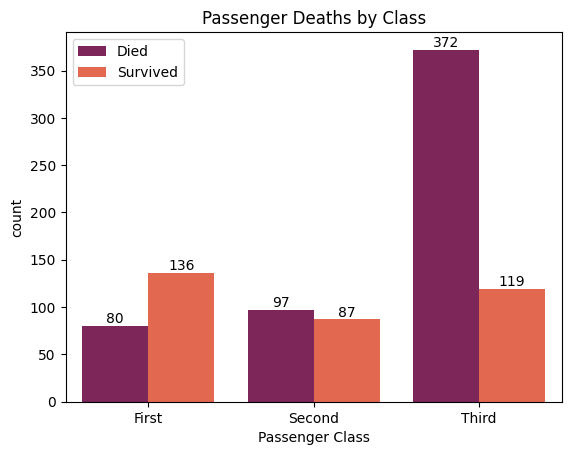

In [ ]:
i_class_survival = sns.countplot(data=train_df,
                                 x='Pclass',
                                 hue='Survived',
                                 palette='rocket',
                                 saturation=.85
                               )

i_class_survival.set(title='Passenger Deaths by Class',
                   xticklabels=['First', 'Second', 'Third'],
                   xlabel='Passenger Class')

i_class_survival.legend(labels = ['Died', 'Survived'])

for container in i_class_survival.containers:
  i_class_survival.bar_label(container)

**Gender**

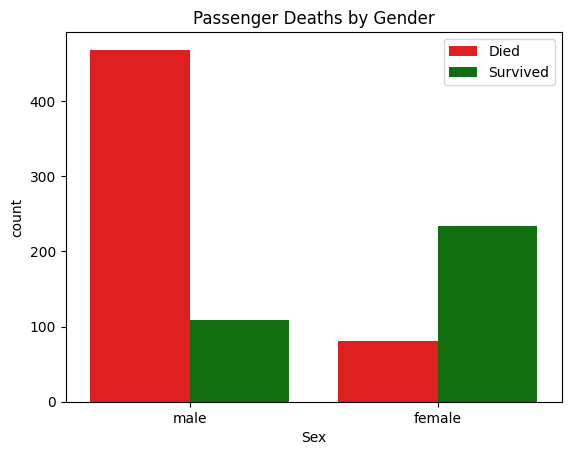

In [ ]:
gender = sns.countplot(data=train_df,
                       x='Sex',
                       hue='Survived',
                       palette=['red', 'green'])

gender.set(title='Passenger Deaths by Gender')
gender.legend(labels = ['Died', 'Survived'])

**Age**

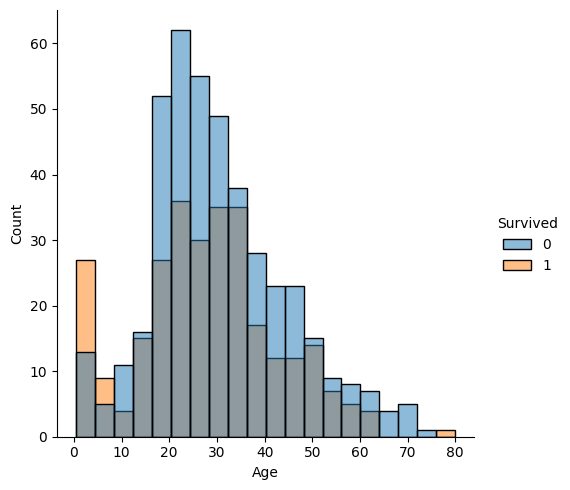

In [ ]:
age_dis = sns.displot(data=train_df,
                          x='Age',
                          hue='Survived')

<ipython-input-37-e8f504c401fc>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(x="Survived", y="Age",


Text(0.5, 1.0, 'Age Distribution')

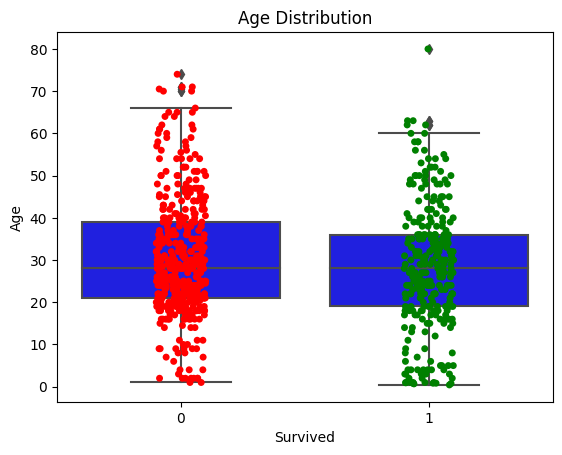

In [ ]:
ax = sns.boxplot(x="Survived", y="Age",
                data=train_df, palette=['blue', 'blue'])
ax = sns.stripplot(x="Survived", y="Age",
                   data=train_df, jitter=True,
                   palette=['red', 'green'])

ax.set_title('Age Distribution')

**SibSp**

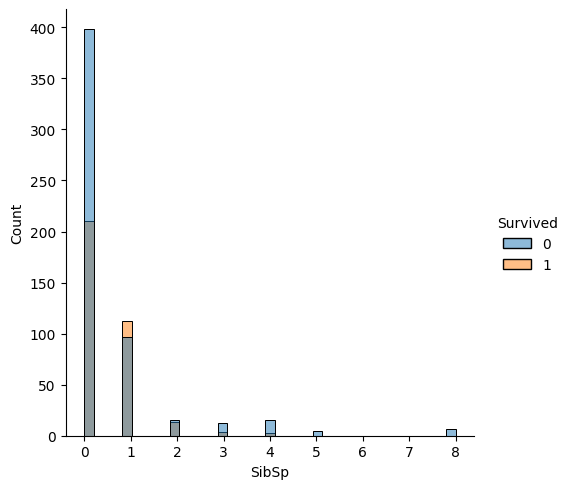

In [ ]:
sib_dis = sns.displot(data=train_df,
                      x='SibSp',
                      hue='Survived')

**ParCh**

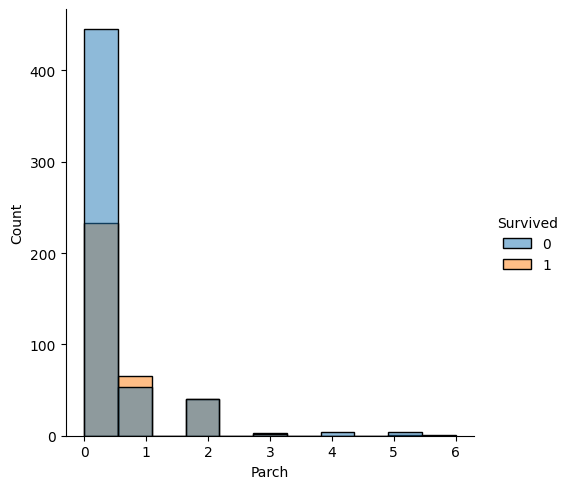

In [ ]:
parch_dis = sns.displot(data=train_df,
                      x='Parch',
                      hue='Survived')

**Fare**

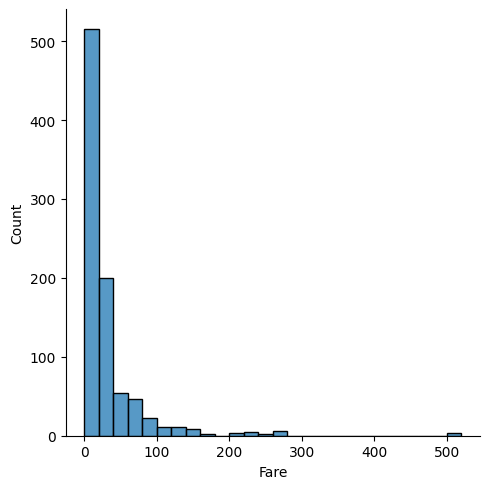

In [ ]:
fare_dis = sns.displot(data=train_df,
                           x='Fare',
                           binwidth=20)

**Analysis**

[Text(0.5, 1.0, 'Passenger Survivability by Age and Fare Cost')]

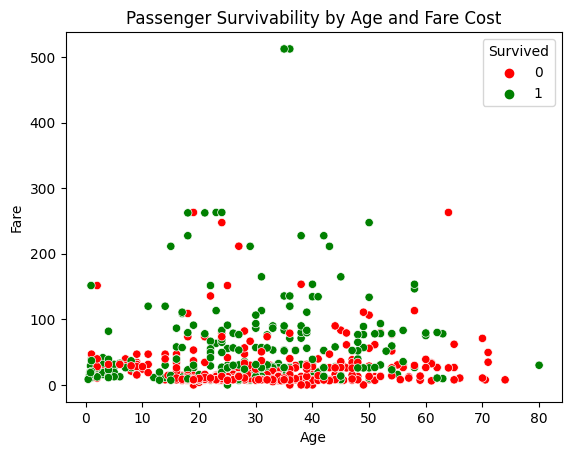

In [ ]:
scatter = sns.scatterplot(data=train_df,
                          x='Age',
                          y='Fare',
                          hue='Survived',
                          palette=['red', 'green']
                          )

scatter.set(title='Passenger Survivability by Age and Fare Cost')

Something to note with the above chart is The clustering of survivors in the bottom left corner. We discover that passengers under the age of ten are much more likely to survive than others, regardless of gender.

# Data Pipeline

---
WIP


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

y = train_df['Survived']

# Select categorial columns
categorical_cols = [cname for cname in X_train_full.columns if
                    train_df[cname].nunique() < 10 and
                    train_df[cname].dtype == "object"]

# Select numerical columns.
numerical_cols = [cname for cname in X_train_full.columns if
                train_df[cname].dtype in ['int64', 'float64']]

# Keeping selected columns.
my_cols = categorical_cols + numerical_cols
X_train = train_df[my_cols].copy()

print(X_train)

        Sex Embarked  PassengerId  Survived  Pclass   Age  SibSp  Parch  \
0      male        S            1         0       3  22.0      1      0   
1    female        C            2         1       1  38.0      1      0   
2    female        S            3         1       3  26.0      0      0   
3    female        S            4         1       1  35.0      1      0   
4      male        S            5         0       3  35.0      0      0   
..      ...      ...          ...       ...     ...   ...    ...    ...   
886    male        S          887         0       2  27.0      0      0   
887  female        S          888         1       1  19.0      0      0   
888  female        S          889         0       3   NaN      1      2   
889    male        C          890         1       1  26.0      0      0   
890    male        Q          891         0       3  32.0      0      0   

        Fare  
0     7.2500  
1    71.2833  
2     7.9250  
3    53.1000  
4     8.0500  
..       

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Random Forest Classifier

---



In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                      ])

clf.fit(X_train, y_train)
pred = clf.predict(X_valid)

print(len(pred))

179


In [ ]:
# Features for decision nodes in the model.
features = ['Pclass', 'Sex', 'SibSp']

# pd.get_dummies() categorizes the features into numerical values.
# Important for columns like 'Sex', Male/Female == 0/1.
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

# n_estimators = num of decision trees | max_depth = depth of trees.
# random_state ??? Might control which features to be used in the decision nodes.
# Might also control which part of the dataset is used in the process? Unsure.
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# model.predict() produces an output using the fitted model and test data.
y_pred = model.predict(X_test)

# Creates output csv using a new dataframe with our predictions.
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_pred})
output.to_csv('predictions.csv', index=False)

# Joins the prediction and test dataframes to fit the new predicted column.
full_predict = output.set_index('PassengerId').join(test_df.set_index('PassengerId'))

print('predictions added.')

predictions added.


# Evaluating Predictions

---



In [ ]:
full_predict.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Visualizing Predictions.

---



Taking a look at Passenger survival rates by Ticket Class.
Deaths within our prediction data seem to trend higher as we move down
the class structure, though this could be partly attributed to the
amount of passengers in each class.

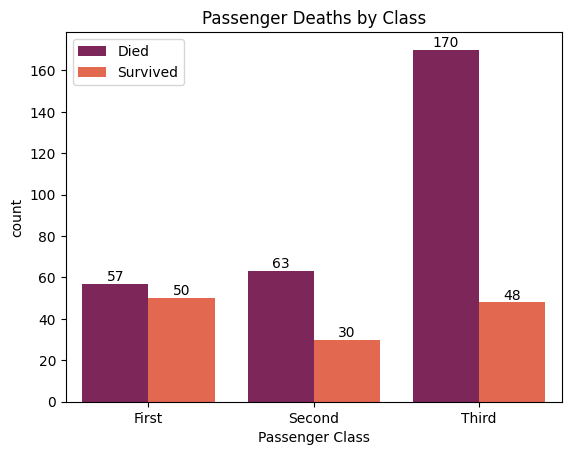

In [ ]:
class_survival = sns.countplot(data=full_predict,
                               x='Pclass',
                               hue='Survived',
                               palette='rocket',
                               saturation=.85
                               )

class_survival.set(title='Passenger Deaths by Class',
                   xticklabels=['First', 'Second', 'Third'],
                   xlabel='Passenger Class')

class_survival.legend(labels = ['Died', 'Survived'])

for container in class_survival.containers:
  class_survival.bar_label(container)

[Text(0.5, 1.0, 'Passenger Survivability by Age and Fare Cost')]

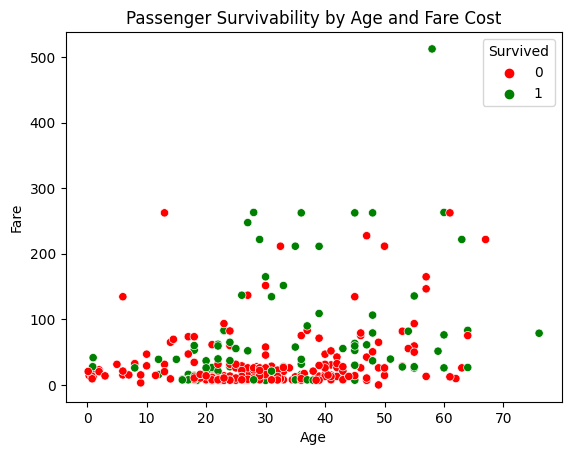

In [ ]:
scatter = sns.scatterplot(data=full_predict,
                          x='Age',
                          y='Fare',
                          hue='Survived',
                          palette=['red', 'green']
                          )

scatter.set(title='Passenger Survivability by Age and Fare Cost')

Using the initial random forest model, our predictions have some inconsistencies with the initial data. Mainly might be due to the fact that age is excluded from the features in the initial model.